In [22]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os

In [23]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import Adadelta
import tensorflow as tf
from keras import backend as K
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.Session(config=config)
K.set_session(sess)

In [24]:
K.image_data_format()

'channels_last'

In [25]:
(x0_train, y0_train), (x0_test, y0_test) = mnist.load_data()

In [26]:
x0_train.shape

(60000, 28, 28)

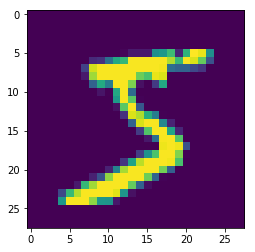

In [27]:
plt.imshow(x0_train[0])

In [28]:
x_train = x0_train.reshape(60000, 28, 28, 1)
x_test = x0_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train = x_train / 255
x_test = x_test / 255

In [29]:
y_train = np_utils.to_categorical(y0_train, 10)
y_test = np_utils.to_categorical(y0_test, 10)

In [30]:
y_train[0]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

In [31]:
x_train.shape[1:]

(28, 28, 1)

In [32]:
model = Sequential()
model.add(Conv2D(10, (3, 3), padding='same', input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(20, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(120, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [33]:
model.add(Flatten())
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss="categorical_crossentropy",
              optimizer=Adadelta(),
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 10)        100       
_________________________________________________________________
activation_6 (Activation)    (None, 28, 28, 10)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 10)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 20)        1820      
_________________________________________________________________
activation_7 (Activation)    (None, 14, 14, 20)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 20)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 120)         21720     
__________

In [34]:
model.fit(x_train, y_train, batch_size=128, epochs=12)

Epoch 1/12
60000/60000 [==============================] - 27s - loss: 0.3141 - acc: 0.9019    
Epoch 2/12
60000/60000 [==============================] - 26s - loss: 0.0659 - acc: 0.9794    
Epoch 3/12
60000/60000 [==============================] - 27s - loss: 0.0468 - acc: 0.9856    
Epoch 4/12
60000/60000 [==============================] - 27s - loss: 0.0369 - acc: 0.9890    
Epoch 5/12
60000/60000 [==============================] - 27s - loss: 0.0309 - acc: 0.9899    
Epoch 6/12
60000/60000 [==============================] - 27s - loss: 0.0262 - acc: 0.9917    
Epoch 7/12
60000/60000 [==============================] - 27s - loss: 0.0222 - acc: 0.9929    
Epoch 8/12
60000/60000 [==============================] - 26s - loss: 0.0195 - acc: 0.9938    
Epoch 9/12
60000/60000 [==============================] - 27s - loss: 0.0167 - acc: 0.9949    
Epoch 10/12
60000/60000 [==============================] - 27s - loss: 0.0144 - acc: 0.9953    
Epoch 11/12
60000/60000 [========================

In [35]:
result = model.predict_classes(x_test)

 9792/10000 [============================>.] - ETA: 0s

In [37]:
pick = np.random.randint(1,9999, 25)

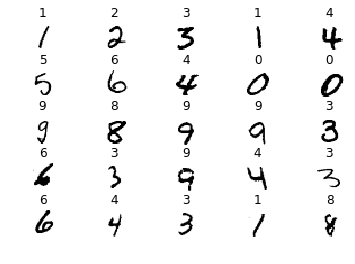

In [38]:
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x0_test[pick[i]], cmap='Greys')
    plt.title(result[pick[i]])
    plt.axis("off")

In [39]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s     


In [40]:
loss, acc = score

In [41]:
print(acc)

0.9912


In [42]:
from ipywidgets import interact_manual

我們的神經網路說是: 5


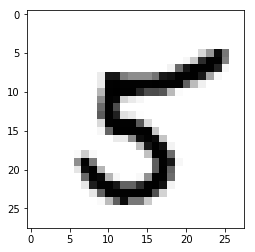

In [43]:
no_test=np.random.randint(0,10000)
plt.imshow(x0_test[no_test], cmap="Greys")
nn_predict = result[no_test]
print('我們的神經網路說是:', nn_predict)

In [44]:
def pickone():
    no_test=np.random.randint(0,10000)
    nn_predict = result[no_test]
    print('我們的神經網路說是:', nn_predict)
    plt.imshow(x0_test[no_test], cmap="Greys")
    plt.show()

In [45]:
interact_manual(pickone)

Widget Javascript not detected.  It may not be installed or enabled properly.


<function __main__.pickone>